In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
mydata = pd.read_csv("dataset.csv")
mydata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
iv = mydata[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2  , n_init =10 , random_state =0 )

In [16]:
kmeans.fit(iv)
kmeans.predict(iv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
wss= []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, n_init =10 ,random_state =0 )
    kmeans.fit(iv)
    wss.append(kmeans.inertia_)  #Inertia: Sum of distances of samples to their closest cluster center 
    print (i, kmeans.inertia_)

1 269981.28
2 181363.595959596
3 106348.37306211119
4 73679.78903948837
5 44448.45544793371
6 37265.86520484347
7 30259.65720728547
8 25095.703209997548
9 21830.041978049434
10 20736.679938924124


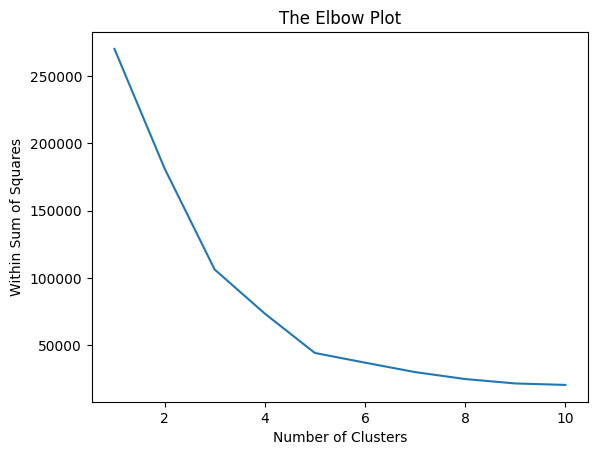

In [18]:
plt.plot(range(1,11),wss)
plt.title("The Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , n_init =10 , random_state =0 )
kmeans.fit_predict(iv)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
iv['cluster']=kmeans.fit_predict(iv)
iv.head()

C:\Users\Tashik\AppData\Local\Temp\ipykernel_19368\4206629202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iv['cluster']=kmeans.fit_predict(iv)


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


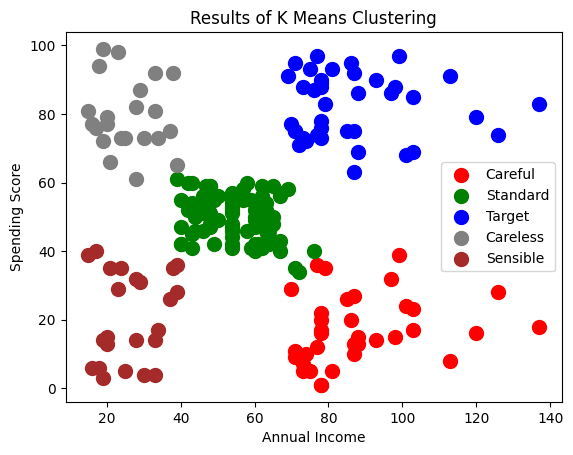

In [21]:
plt.scatter(iv.loc[iv['cluster']==0,'Annual Income (k$)'],iv.loc[iv['cluster']==0,'Spending Score (1-100)'],s=100,c='red',label='Careful')
plt.scatter(iv.loc[iv['cluster']==1,'Annual Income (k$)'],iv.loc[iv['cluster']==1,'Spending Score (1-100)'],s=100,c='green',label='Standard')
plt.scatter(iv.loc[iv['cluster']==2,'Annual Income (k$)'],iv.loc[iv['cluster']==2,'Spending Score (1-100)'],s=100,c='blue',label='Target')
plt.scatter(iv.loc[iv['cluster']==3,'Annual Income (k$)'],iv.loc[iv['cluster']==3,'Spending Score (1-100)'],s=100,c='grey',label='Careless')
plt.scatter(iv.loc[iv['cluster']==4,'Annual Income (k$)'],iv.loc[iv['cluster']==4,'Spending Score (1-100)'],s=100,c='brown',label='Sensible')


plt.title("Results of K Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [22]:
iv[(iv['cluster']==4)][['Spending Score (1-100)','cluster']]

,Spending Score (1-100),cluster
0,39,4
2,6,4
4,40,4
6,6,4
8,3,4
10,14,4
12,15,4
14,13,4
16,35,4
18,29,4
